In [25]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import Dataset, DataLoader
import torchvision.transforms as transforms 
from torchvision.datasets import ImageFolder
import timm

from tqdm.notebook import tqdm

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [6]:
class CatsDogsDataset(Dataset):
    def __init__(self, data_dir, transform=None):
        self.data = ImageFolder(data_dir, transform=transform)

    def __len__(self):
        return len(self.data)
    
    def __getitem__(self, idx):
        return self.data[idx]
    
    @property
    def classes(self):
        return self.data.classes

In [7]:
dataset = CatsDogsDataset(
    data_dir='./train_data'
)

0


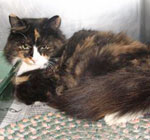

In [8]:
image, label = dataset[100]
print(label)
image

In [9]:
print(dataset.classes)

['Cat', 'Dog']


In [11]:
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
])

data_dir = './train_data'
dataset = CatsDogsDataset(data_dir, transform)

In [12]:
image, label = dataset[0]
image.shape

torch.Size([3, 128, 128])

In [13]:
# iterate over dataset
for image, label in dataset:
    break

In [14]:
dataloader = DataLoader(dataset, batch_size=32, shuffle=True)

In [15]:
for images, labels in dataloader:
    break

In [16]:
images.shape, labels.shape

(torch.Size([32, 3, 128, 128]), torch.Size([32]))

In [18]:
class CatsDogsClassifer(nn.Module):
    def __init__(self, num_classes=2):
        super(CatsDogsClassifer, self).__init__()
        self.base_model = timm.create_model('efficientnet_b0', pretrained=True)
        self.features = nn.Sequential(*list(self.base_model.children())[:-1])

        enet_out_size = 1280
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(enet_out_size, num_classes)
        )
    
    def forward(self, x):
        x = self.features(x)
        output = self.classifier(x)
        return output

In [ ]:
model = CatsDogsClassifer(num_classes=2)

CatsDogsClassifer(
  (base_model): EfficientNet(
    (conv_stem): Conv2d(3, 32, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (bn1): BatchNormAct2d(
      32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
      (drop): Identity()
      (act): SiLU(inplace=True)
    )
    (blocks): Sequential(
      (0): Sequential(
        (0): DepthwiseSeparableConv(
          (conv_dw): Conv2d(32, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=32, bias=False


In [20]:
example_out = model(images)
example_out.shape 

torch.Size([32, 2])

In [21]:
criterion = nn.CrossEntropyLoss() # loss function
optimizer = optim.Adam(model.parameters(), lr=0.001) # optimizer

In [22]:
criterion(example_out, labels)
print(example_out.shape, labels.shape)

torch.Size([32, 2]) torch.Size([32])


In [27]:
transform = transforms.Compose([
    transforms.Resize((128, 128)),
    transforms.ToTensor(),
])

train_folder = './train_data/'
test_folder = './test_data/'

train_dataset = CatsDogsDataset(train_folder, transform=transform)
test_dataset = CatsDogsDataset(test_folder, transform=transform)

train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=32, shuffle=False)

In [30]:
# Simple training loop
num_epochs = 5
train_losses, val_losses = [], []

model = CatsDogsClassifer(num_classes=2)


criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

for epoch in range(num_epochs):
    # Training phase
    model.train()
    running_loss = 0.0
    for images, labels in train_loader:
        # Move inputs and labels to the device
        
        optimizer.zero_grad()
        outputs = model(images)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()
        running_loss += loss.item() * labels.size(0)
    train_loss = running_loss / len(train_loader.dataset)
    train_losses.append(train_loss)
    

    print(f"Epoch {epoch+1}/{num_epochs} - Train loss: {train_loss}")

: 